## Homework: Open-Source LLMs

In this homework, we'll experiment more with Ollama

> It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Q1. Running Ollama with Docker

Let's run ollama with Docker. We will need to execute the 
same command as in the lectures:

```bash
docker run -it \
    --rm \
    -v ollama:/root/.ollama \
    -p 11434:11434 \
    --name ollama \
    ollama/ollama
```

What's the version of ollama client? 

To find out, enter the container and execute `ollama` with the `-v` flag.

>> The version of ollama running in docker is : 0.1.48
<br>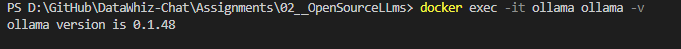

## Q2. Downloading an LLM 

We will download a smaller LLM - gemma:2b. 

Again let's enter the container and pull the model:

```bash
ollama pull gemma:2b
```

In docker, it saved the results into `/root/.ollama`

We're interested in the metadata about this model. You can find
it in `models/manifests/registry.ollama.ai/library`

What's the content of the file related to gemma?

>> Content of this file can be obtained as below:
<br> 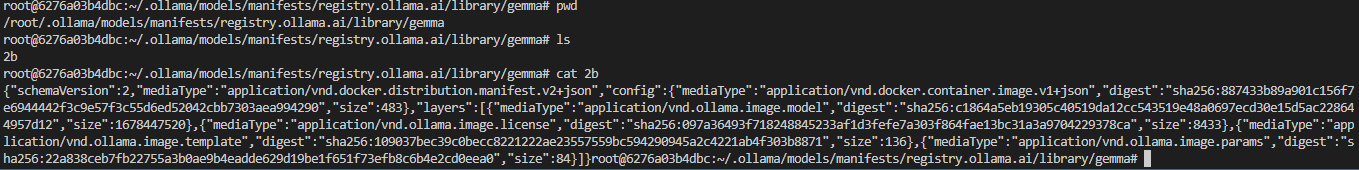

## Q3. Running the LLM

Test the following prompt: "10 * 10". What's the answer?

>> Use command 'ollama run gemma:2b' after running ollama docker bash in terminal. We get below erply with the prompt '10*10':
<br> 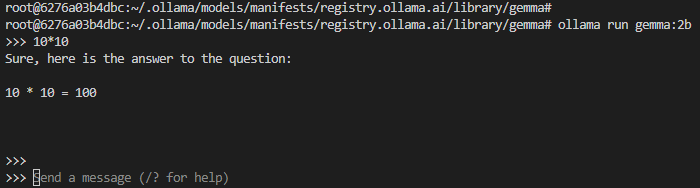

## Q4. Donwloading the weights 

We don't want to pull the weights every time we run
a docker container. Let's do it once and have them available
every time we start a container.

First, we will need to change how we run the container.

Instead of mapping the `/root/.ollama` folder to a named volume,
let's map it to a local directory:

```bash
mkdir ollama_files

docker run -it \
    --rm \
    -v ./ollama_files:/root/.ollama \
    -p 11434:11434 \
    --name ollama \
    ollama/ollama
```

Now pull the model:

```bash
docker exec -it ollama ollama pull gemma:2b 
```

What's the size of the `ollama_files/models` folder? 

* 0.6G
* 1.2G
* 1.7G
* 2.2G

Hint: on linux, you can use `du -h` for that.

>> The command that worked as expected on windows is : docker run -it --rm -v D:/GitHub/DataWhiz-Chat/Assignments/02__OpenSourceLLms/ollama_files:/root/.ollama -p 11434:11434 --name ollama

>> The 'model' folder is ~1.7GB:
<br>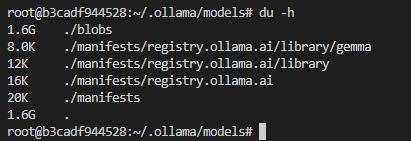

## Q5. Adding the weights 

Let's now stop the container and add the weights 
to a new image

For that, let's create a `Dockerfile`:

```dockerfile
FROM ollama/ollama

COPY ...
```

What do you put after `COPY`?

>> Below is the dockerfile line with copy:
- [on windows] COPY D:/GitHub/DataWhiz-Chat/Assignments/02__OpenSourceLLms/ollama_files /root/.ollama
- [on linux] COPY ./ollama_files /root/.ollama

## Q6. Serving it 

Let's build it:

```bash
docker build -t ollama-gemma2b .
```

And run it:

```bash
docker run -it --rm -p 11434:11434 ollama-gemma2b
```

We can connect to it using the OpenAI client

Let's test it with the following prompt:

```python
prompt = "What's the formula for energy?"
```

Also, to make results reproducible, set the `temperature` parameter to 0:

```bash
response = client.chat.completions.create(
    #...
    temperature=0.0
)
```

How many completion tokens did you get in response?

* 304
* 604
* 904
* 1204

>> The command that actually worked to run the docker container is : docker run -it --rm -p 11434:11434 --name ollama-gemma2b ollama-gemma2b
>> <br>Afterwards I was able to use command 'docker exec -it ollama-gemma2b bash'. The command provided in question worked but then this one could not identify the container with name ollama-gemma2b.

In [4]:
from openai import OpenAI

client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',
)

prompt = "What's the formula for energy?"

response = client.chat.completions.create(
        model='gemma:2b',
        temperature=0.0,
        messages=[{"role": "user", "content": prompt}]
    )

In [13]:
gemma_reply = response.choices[0].message.content
print(gemma_reply)

Sure, here's the formula for energy:

**E = K + U**

Where:

* **E** is the energy in joules (J)
* **K** is the kinetic energy in joules (J)
* **U** is the potential energy in joules (J)

**Kinetic energy (K)** is the energy an object possesses when it moves or is in motion. It is calculated as half the product of an object's mass (m) and its velocity (v) squared:

**K = 1/2mv^2**

**Potential energy (U)** is the energy an object possesses due to its position or configuration. It is calculated as the product of an object's mass, gravitational constant (g), and height or position above a reference point.

**U = mgh**

Where:

* **m** is the mass in kilograms (kg)
* **g** is the gravitational constant (9.8 m/s^2)
* **h** is the height or position in meters (m)

The formula shows that energy can be expressed as the sum of kinetic and potential energy. The kinetic energy is a measure of the object's ability to do work, while the potential energy is a measure of the object's ability to do w

In [17]:
response.usage

CompletionUsage(completion_tokens=281, prompt_tokens=34, total_tokens=315)

>> It seems total tokens in reply was 281 which is close to : 304